# Embedded ML - Lab 1.1: Artificial Neural Networks in Python

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some helper functions but you are expected to write most of the code and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Implement a Python class for a linear regressor that has at least three methods to intitialize, predict an output and compute the error. Write then a simple code that instantiates the class to make a linear aproximation of two small given datasets and report the errors obtained.

----------------- Model for dataset A ----------------
iteracion: 0
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[2, -3, -8, -13, -18, -23, -28, -33, -38, -43]
The error metric is	: 105.19030373565806
iteracion: 1
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The error metric is	: 24.08318915758459
iteracion: 2
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
The error metric is	: 14.317821063276353



----------------- Model for dataset B ----------------
iteracion: 0
Expected Y values are:	[-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predicted Y values are:	[-2.16, -0.6000000000000001, 0.23199999999999998, 0.96, 2.0, 2.988, 4.08, 5.224, 6.16, 7.98]
The error metric is	: 9.603822364038185
iteracion: 1
Expected Y values are:	[-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predicted Y value

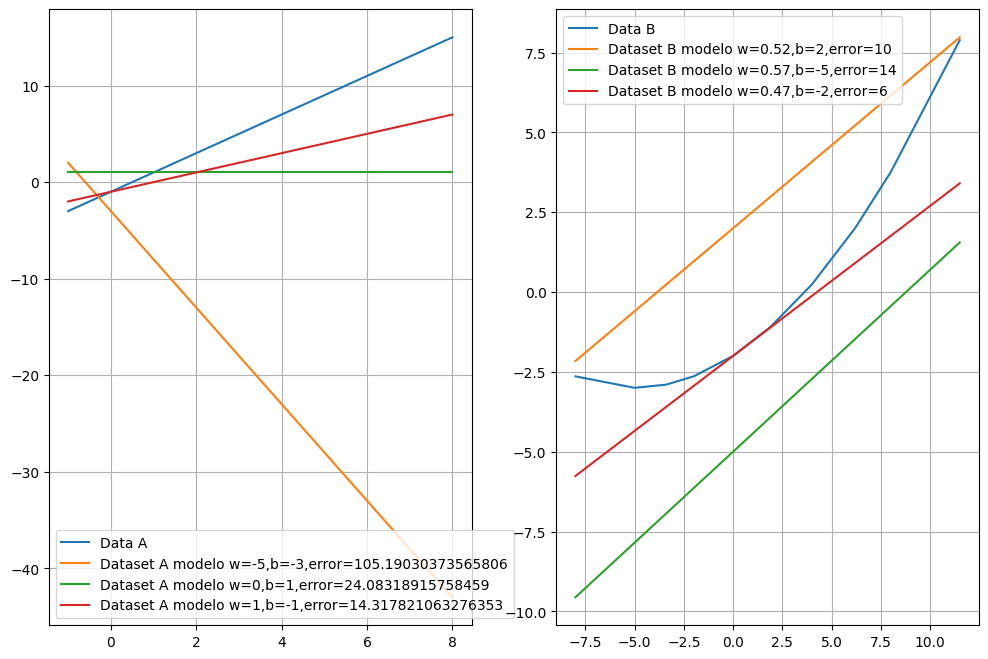

In [1]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=100)

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    # predict all the corresponding Y values from X, using a linear model
    # code...
    for i in range(len(x)):
      self.myY.append(x[i]*self.w+self.b)

    return self.myY

  def error(self, y):
    total_square_error = 0

    # compute the total error using the same metric seen in the lecture
    # code...
    for i in range(len(y)):
      total_square_error += (y[i]-self.myY[i])**2

    return total_square_error**(1/2)

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}

# assign proper dataset arrays to x and y
# code...
print("----------------- Model for dataset A ----------------")
x = datasets["A"].get("input")
y = datasets["A"].get("output")
modelos_A = []
plt.subplot(1,2,1)
plt.plot(x,y, label='Data A')
w_a = [-5,0,1]
b_a = [-3,1,-1]
for models in range(3):
  w = w_a[models]
  b = b_a[models]
  model = LinRegressor(w, b)
  modelos_A.append(model)
  print("iteracion:", models)
  print("Expected Y values are:\t" + str(y))
  print("Predicted Y values are:\t" + str(model.predict(x)))
  print("The error metric is\t: " + str(model.error(y)))
  plt.plot(x,model.predict(x), label='Dataset A modelo w={},b={},error={}'.format(w,b,model.error(y)))

plt.legend()
plt.grid()




print("\n\n\n----------------- Model for dataset B ----------------")
x = datasets["B"].get("input")
y = datasets["B"].get("output")
modelos_B = []
plt.subplot(1,2,2)
plt.plot(x,y, label='Data B')
w_b = [0.52,0.57,0.47]
b_b = [2,-5,-2]
for models in range(3):
  w = w_b[models]
  b = b_b[models]
  model = LinRegressor(w, b)
  modelos_B.append(model)
  print("iteracion:", models)
  print("Expected Y values are:\t" + str(y))
  print("Predicted Y values are:\t" + str(model.predict(x)))
  print("The error metric is\t: " + str(model.error(y)))
  plt.plot(x,model.predict(x), label='Dataset B modelo w={},b={},error={}'.format(round(w,2),round(b,2),round(model.error(y)),2))




plt.legend()
plt.grid()
plt.show()

Measure the error for three different sets of parameter values, for each dataset. Plot the datasets against the predictions and analyze the model results obtained.



*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?



1.  The error for dataset A could be zero since it is observed that the data describe a linear function.

2. The error cannot be zero for dataset B since the data does not describe a linear function, therefore our linear regression model cannot correctly represent the data.

3. No, since an error may represent that the system fits the training data perfectly, but not that the system correctly represents all the data.

4. No, in general many data do not represent linear distributions therefore our regression model is not able to represent it.

### Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Implement a Python class for a simple neural network with three layers: input, hidden and output. The class should have three parameters to specify each layer's size and at least 7 methods that implement:

* Initialization
* A Sigmoid activation function
* A sigmoid derivative
* A fordward pass to compute each layer's outputs
* Compute and print error
* Model training
* Model inference

Instantiate the class to create, train and test a model that learns the XOR function.

In [ ]:
## without numpy
import math
import random as rand

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # get network size parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # initialize weights and biases randomly
        self.hidden_weights = [[rand.random() for i in range(hidden_size)] for j in range(input_size)]
        self.hidden_bias = [rand.random() for i in range(hidden_size)]
        self.output_weights = [[rand.random() for i in range(output_size)] for j in range(hidden_size)]
        self.output_bias = [rand.random() for i in range(output_size)]

    def sigmoid(self, x):
          # scalar sigmoid activation function
          return 1 / (1 + math.exp(-x))

    def sigmoid_vec(self, X):
        # vector sigmoid activation function
        activation = []
        for elem in X:
          activation.append(self.sigmoid(elem))

        return activation

    def sigmoid_derivative(self, x):
        # scalar sigmoid derivative
        return x * (1 - x)

    def sigmoid_derivative_vec(self, X):
        # vector sigmoid derivative
        grad = []
        for elem in X:
          grad.append(self.sigmoid_derivative(elem))

        return grad

    def forward_pass(self, input):

        def vec_matrix_mult(A, B):
            result = []
            for i in range(len(B[0])):
                dot_product = sum(A[j] * B[j][i] for j in range(len(A)))
                result.append(dot_product)

            return result

        def add_vec(X, b):
            # add scalar to vector
            # code...

            return X

        # forward pass hidden layer
        MULT = vec_matrix_mult(input, self.hidden_weights)
        SUM = add_vec(MULT, self.hidden_bias)
        self.hidden_layer_activation = self.sigmoid_vec(SUM)

        # forward pass output layer
        MULT = vec_matrix_mult(self.hidden_layer_activation, self.output_weights)
        SUM = add_vec(MULT, self.output_bias)
        self.output_layer_activation = self.sigmoid_vec(SUM)

    def backpropagation(self, X, y, learning_rate):

        def transpose(matrix):
            # Calculate dimensions of the original matrix
            rows = len(matrix)
            cols = len(matrix[0])

            # Create a new transposed matrix filled with zeros
            transposed = [[0 for _ in range(rows)] for _ in range(cols)]

            # Fill in values from the original matrix to the transposed matrix
            for i in range(rows):
                for j in range(cols):
                    transposed[j][i] = matrix[i][j]

            return transposed

        # Calculate error and delta for output layer
        output_error = [y[i] - self.output_layer_activation[i] for i in range(len(y))]
        output_delta = [output_error[i] * self.sigmoid_derivative(self.output_layer_activation[i]) for i in range(len(output_error))]

        # Calculate error and delta for hidden layer
        hidden_error = [0] * len(self.hidden_layer_activation)
        for i in range(len(self.hidden_layer_activation)):
            for j in range(len(output_delta)):
                hidden_error[i] += output_delta[j] * transpose(self.output_weights)[j][i]
        hidden_delta = [hidden_error[i] * self.sigmoid_derivative(self.hidden_layer_activation[i]) for i in range(len(hidden_error))]

        # Update weights and biases
        for i in range(len(transpose(self.output_weights))):
            for j in range(len(transpose(self.output_weights)[i])):
                transpose(self.output_weights)[i][j] += self.hidden_layer_activation[j] * output_delta[i] * learning_rate
        self.output_bias += [sum(output_delta) * learning_rate]

        for i in range(len(self.hidden_weights)):
            for j in range(len(self.hidden_weights[i])):
                self.hidden_weights[i][j] += transpose(X)[j] * hidden_delta[i] * learning_rate
        self.hidden_bias += [sum(hidden_delta) * learning_rate]

    def train(self, input, output, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            # perform forward pass
            for i in range(len(input)):
                self.forward_pass(input[i])

                # print error
                # code...

                # perform backpropagation and update weights and biases
                self.backpropagation(input[i], output[i], learning_rate)

    def predict(self, input):
        # run a prediction for a single input
        # code...

# define training data
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0],[1],[1],[0]]

# create neural network
# code

# train neural network
nn.train(X, Y, learning_rate=0.1, num_epochs=10000)

# evaluate trained model on test data
# code...

How many multiplications and additions are requiered for a forward pass, for a training pass and for a complete training?

### Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the MNIST dataset. The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). Try the model multiple times with different amount of neurons in the hidden layer.

Make a table to report the following for each model:

*   Number of model parameters
*   Number of multiplications and aditions for a forward pass
*   Execution time for training and for a forward pass